In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sales_dataset.csv')

/tmp/ipython-input-4067223394.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/sales_dataset.csv')


In [ ]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,0.0,MUMBAI,MAHARASHTRA,400081.0,IN,Unknown,False,Easy Ship,Unknown
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,Unknown
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown,Unknown
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,0.0,PUDUCHERRY,PUDUCHERRY,605008.0,IN,Unknown,False,Easy Ship,Unknown
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,Unknown,False,Unknown,Unknown


In [ ]:
#what are the types of the column
df.dtypes

,0
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object
Size,object


In [ ]:
#is there any null values?
df.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [ ]:
#what is the dimension of the dataframe?
df.shape

(128949, 23)

In [ ]:
df.loc[df['Status'] == 'Cancelled', 'Amount']=0

In [ ]:
#filling the null values in Amount column with median
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [ ]:
df['Amount'].isnull().sum()

np.int64(0)

In [ ]:
#filling the null values in Courier status column
df['Courier Status'] = df['Courier Status'].fillna('Unknown')

In [ ]:
#filling the null values in currency column
df['currency'] = df['currency'].fillna('Unknown')

**Filling the null values of the ship-city,ship-state,ship-postal-codes and ship-country columns**

In [ ]:
df['ship-city'] = df['ship-city'].fillna('Unknown')

In [ ]:
df['ship-state'] = df['ship-state'].fillna('Unknown')

In [ ]:
df['ship-postal-code'] = df['ship-postal-code'].fillna('Unknown')

In [ ]:
df['ship-country'] = df['ship-country'].fillna('Unknown')

In [ ]:
df.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [ ]:
#is there any duplicate row?
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(6)

In [ ]:
#droping the duplicate rows
droping_duplicates = df.drop_duplicates()

In [ ]:
df.shape

(128949, 23)

In [ ]:
#converting date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'].head(20)

,Date
0,2022-04-30
1,2022-04-30
2,2022-04-30
3,2022-04-30
4,2022-04-30
5,2022-04-30
6,2022-04-30
7,2022-04-30
8,2022-04-30
9,2022-04-30


In [ ]:
df['Date'].tail(20)

,Date
128929,2022-05-31
128930,2022-05-31
128931,2022-05-31
128932,2022-05-31
128933,2022-05-31
128934,2022-05-31
128935,2022-05-31
128936,2022-05-31
128937,2022-05-31
128938,2022-05-31


**Financial Performance Analysis**

In [ ]:
#extracting the year from the 'Date' column to create a new 'year' column
df['year'] = df['Date'].dt.year

In [ ]:
#total revenue in year
yearly_revenue = df.groupby('year')['Amount'].sum()
yearly_revenue

,Amount
year,
2022,71774948.62


In [ ]:
#Calculating the monthly revenue
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Amount'].sum().reset_index()

monthly_revenue

,Month,Amount
0,2022-03,95355.00
1,2022-04,26278569.62
2,2022-05,23983543.00
3,2022-06,21417481.00


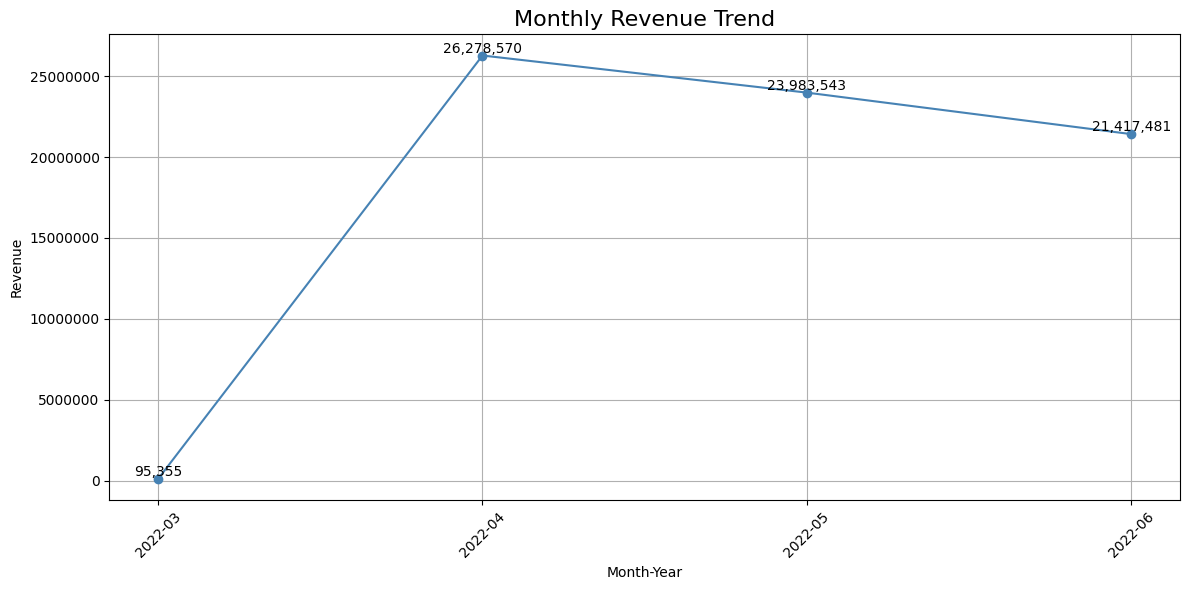

In [ ]:
df['Month-Year'] = df['Date'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('Month-Year')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month-Year'], monthly_revenue['Amount'], marker='o', color='steelblue')

for i in range(len(monthly_revenue)):
    plt.text(monthly_revenue['Month-Year'][i], monthly_revenue['Amount'][i],
             f'{monthly_revenue["Amount"][i]:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#best selling products' revenue
best_selling_products_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
best_selling_products_revenue

,Amount
Category,
Set,35779587.14
kurta,19473807.48
Western Dress,10208405.00
Top,4908912.00
Ethnic Dress,732061.00
Blouse,420569.00
Bottom,135998.00
Saree,114694.00
Dupatta,915.00


In [ ]:
df['Revenue'] = df['Qty'] * df['Amount']
total_revenue = df['Revenue'].sum()
category_revenue = df.groupby('Category')['Revenue'].sum()

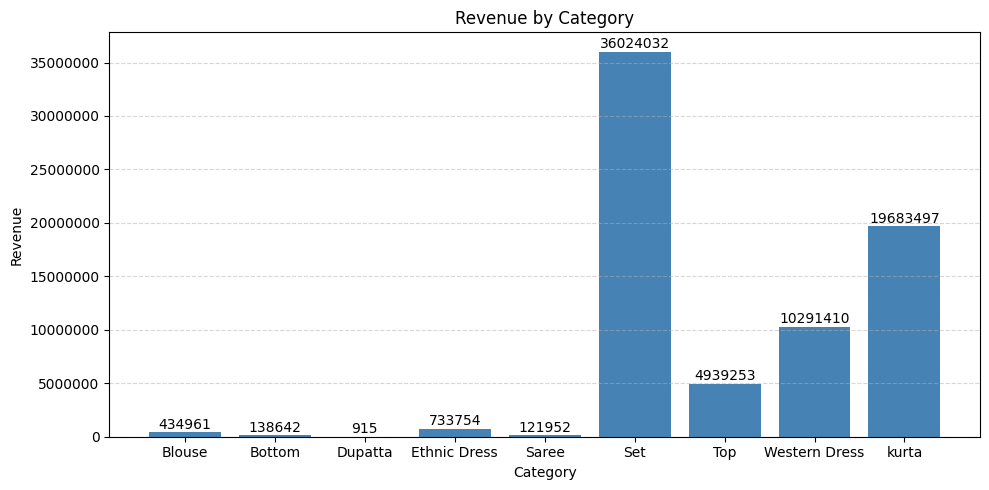

In [ ]:
top_10_revenue = best_selling_products_revenue.head(10)
plt.figure(figsize=(10, 5))
bars = plt.bar(category_revenue.index, category_revenue.values, color='steelblue')

for bar in bars:
    height = bar.get_height()
    # Place the label just above the top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50000,
             f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Adding title and labels
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#calculating the average order value to understand the spending behaviour
order_totals = df.groupby('Order ID')['Amount'].sum()
Avg_Order_Value = order_totals.mean()
Avg_Order_Value

np.float64(596.3752045666047)

In [ ]:
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_sales = df.groupby('Week')['Amount'].sum().reset_index()

In [ ]:
weekly_metrics = df.groupby('Week').agg({
    'Amount': 'sum',
    'Order ID': pd.Series.nunique
}).reset_index()

weekly_metrics['AOV'] = weekly_metrics['Amount'] / weekly_metrics['Order ID']

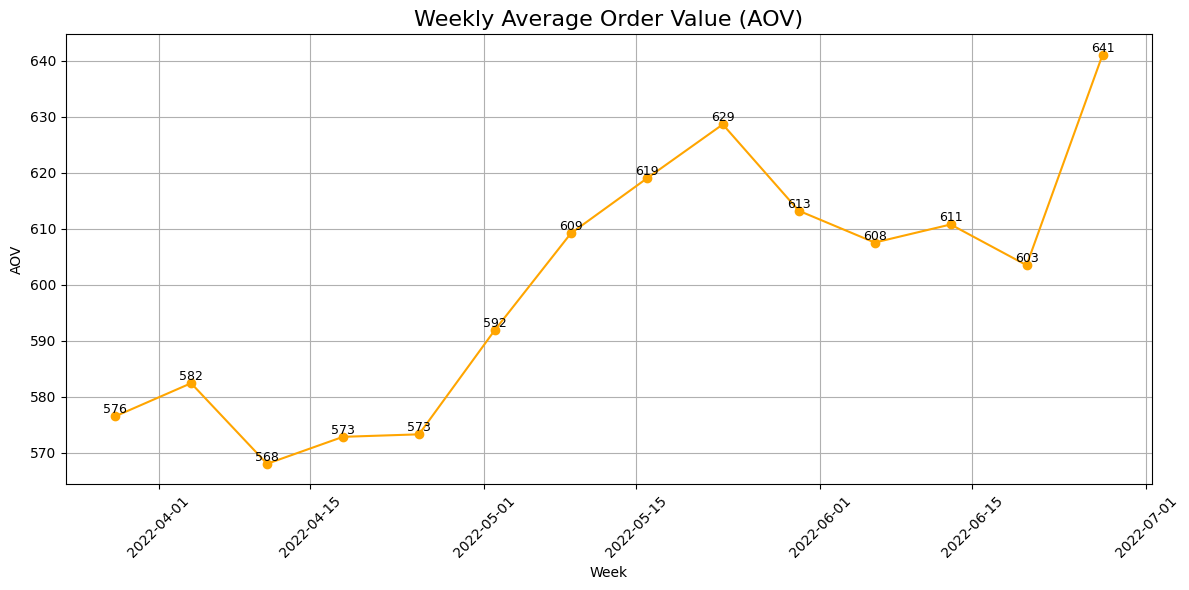

In [ ]:
# Weekly AOV
plt.figure(figsize=(12, 6))
plt.plot(weekly_metrics['Week'], weekly_metrics['AOV'], marker='o', color='orange')

for i in range(len(weekly_metrics)):
    plt.text(weekly_metrics['Week'][i], weekly_metrics['AOV'][i],
             f'{weekly_metrics["AOV"][i]:.0f}', ha='center', va='bottom', fontsize=9)

# Adding title and labels
plt.title('Weekly Average Order Value (AOV)', fontsize=16)
plt.xlabel('Week')
plt.ylabel('AOV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

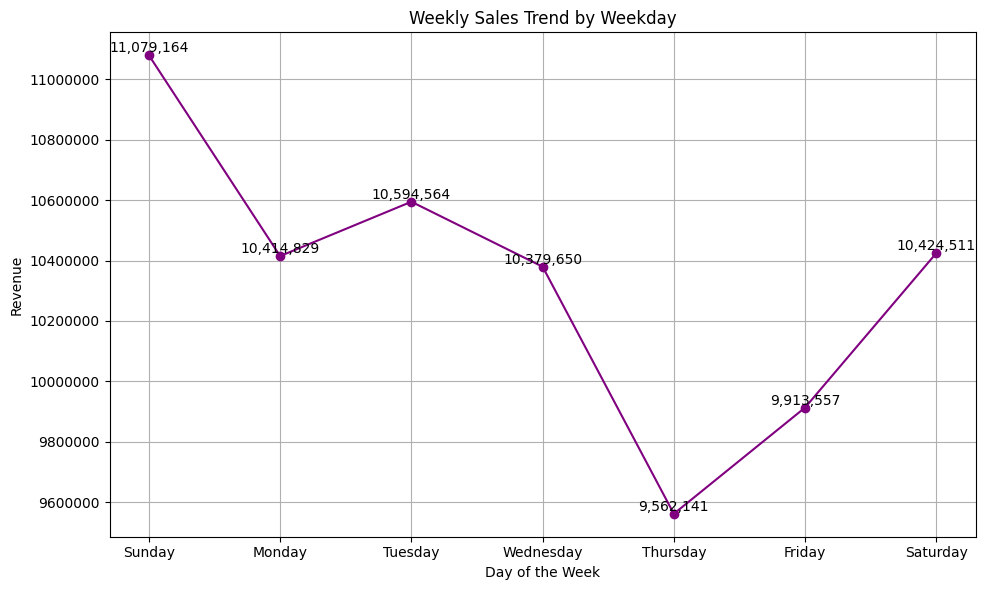

In [ ]:
# Weekly sales
df['Weekday'] = df['Date'].dt.day_name()
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
grouping = df.groupby('Weekday')['Revenue'].sum().reindex(weekday_order)

plt.figure(figsize=(10, 6))
plt.plot(grouping.index, grouping.values, color='purple', marker='o')

for i in range(len(grouping)):
    plt.text(grouping.index[i], grouping.values[i],
             f'{grouping.values[i]:,.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Weekly Sales Trend by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()

**Customer Insights Analysis**

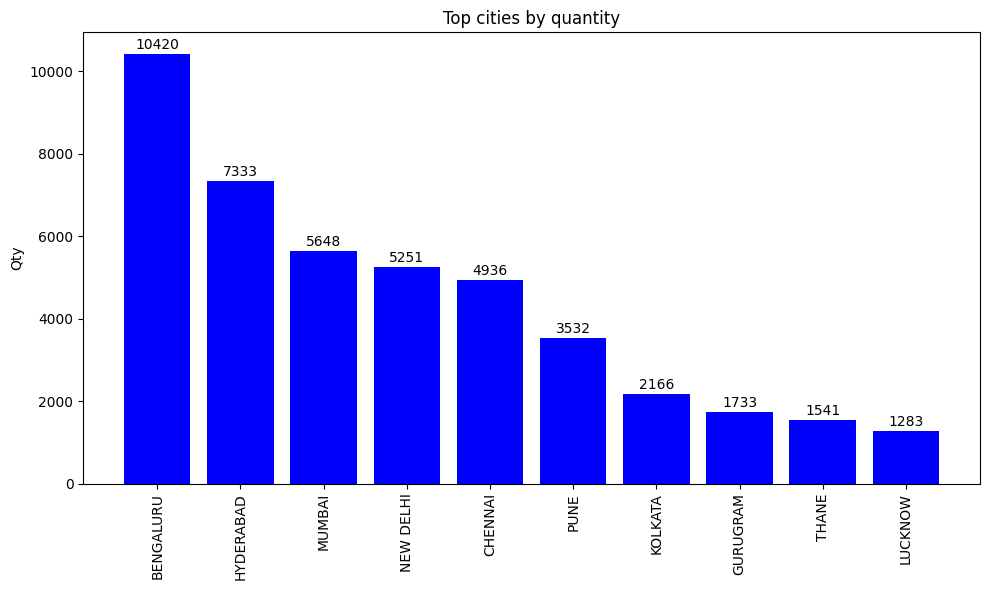

In [ ]:
# Identifying top locations based on Qty
top_cities_by_quantity = df.groupby('ship-city')['Qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_cities_by_quantity.index, top_cities_by_quantity.values, color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Top cities by quantity')
plt.ylabel('Qty')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

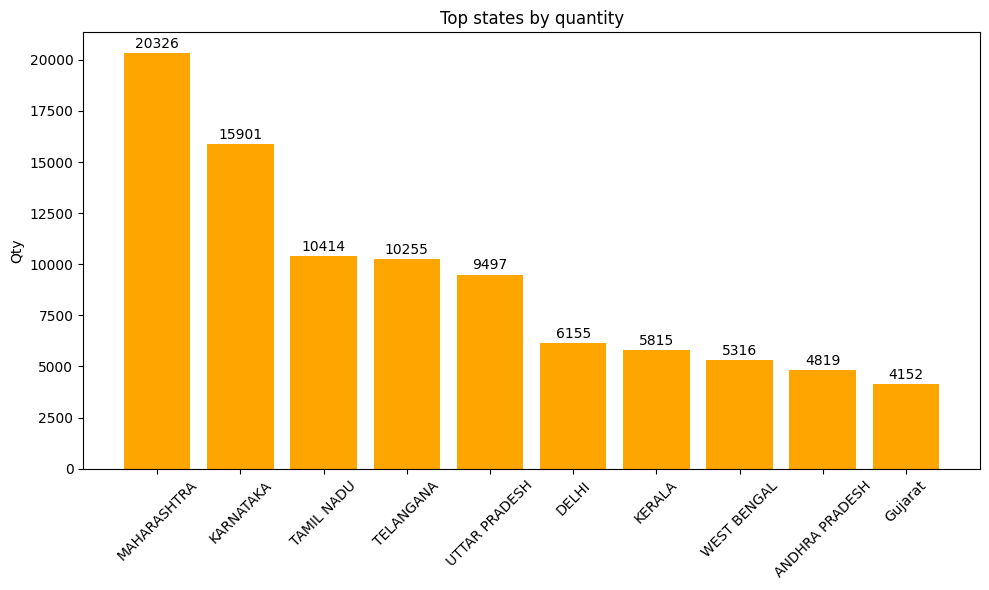

In [ ]:
top_states_by_quantity = df.groupby('ship-state')['Qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_states_by_quantity.index, top_states_by_quantity.values, color='orange')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100, f'{height:.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Top states by quantity')
plt.ylabel('Qty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

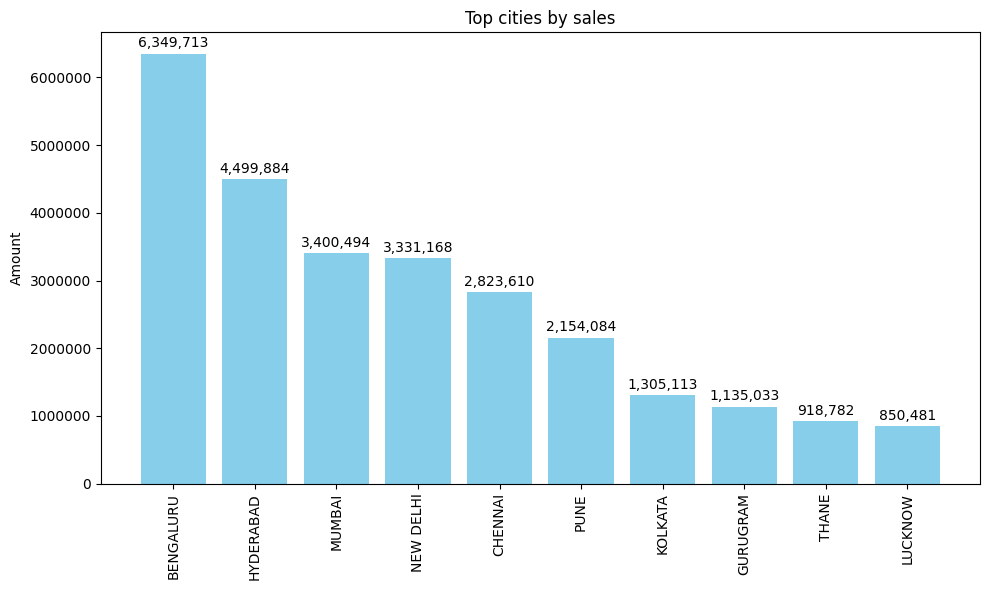

In [ ]:
# Identifying top locations based on sales
top_cities_by_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_cities_by_sales.index, top_cities_by_sales.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50000, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Top cities by sales')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

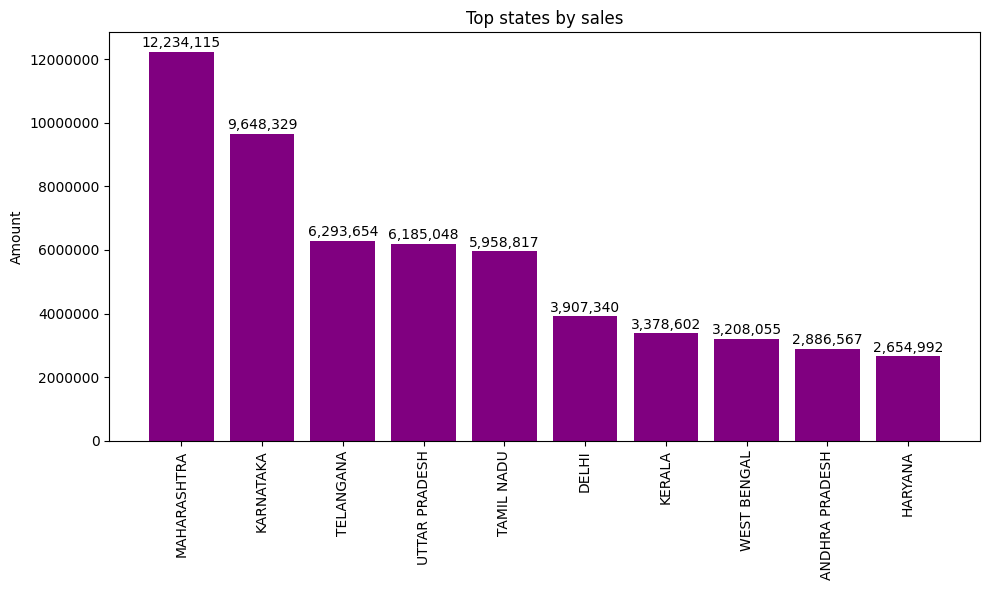

In [ ]:
# Grouping the data by state and summing the sales amount
top_states_by_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_states_by_sales.index, top_states_by_sales.values, color='purple')

# Adding labels to the top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height (sales amount) of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50000, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Top states by sales')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1256244909.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, monthly_cancelled[i] + 100, f'{monthly_cancelled[i]}', ha='center', va='bottom', fontsize=10)
/tmp/ipython-input-1256244909.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, monthly_cancelled[i] + 100, f'{monthly_cancelled[i]}', ha='center', va='bottom', fontsize=10)


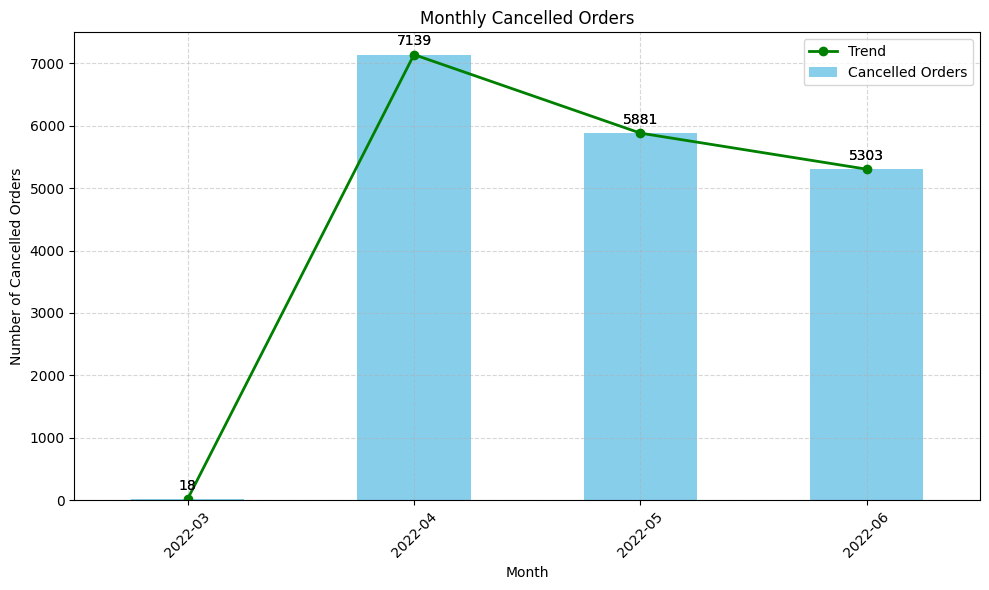

In [ ]:
df['Month'] = df['Date'].dt.to_period('M').astype(str)
cancelled_df = df[df['Status'] == 'Cancelled']
monthly_cancelled = cancelled_df.groupby('Month').size()

# Plotting the bar and line plot on the same axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for cancelled orders
monthly_cancelled.plot(kind='bar', ax=ax, color='skyblue', label='Cancelled Orders')

# Line plot for trend
monthly_cancelled.plot(kind='line', ax=ax, color='green', marker='o', linewidth=2, label='Trend')

for i in range(len(monthly_cancelled)):
    plt.text(i, monthly_cancelled[i] + 100, f'{monthly_cancelled[i]}', ha='center', va='bottom', fontsize=10)

for i in range(len(monthly_cancelled)):
    plt.text(i, monthly_cancelled[i] + 100, f'{monthly_cancelled[i]}', ha='center', va='bottom', fontsize=10)

plt.title('Monthly Cancelled Orders')
plt.xlabel('Month')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'year', 'Month', 'Month-Year',
       'Revenue', 'Week', 'Weekday'],
      dtype='object')

Finding customer retention

In [ ]:
# Combined shipping details to create a customer id column
df['customer_id'] = (
    df['ship-city'].astype(str).str.strip() + '_' +
    df['ship-state'].astype(str).str.strip() + '_' +
    df['ship-postal-code'].astype(str).str.strip() + '_' +
    df['ship-country'].astype(str).str.strip()
)

In [ ]:
df['customer_id'].head()

,customer_id
0,MUMBAI_MAHARASHTRA_400081.0_IN
1,BENGALURU_KARNATAKA_560085.0_IN
2,NAVI MUMBAI_MAHARASHTRA_410210.0_IN
3,PUDUCHERRY_PUDUCHERRY_605008.0_IN
4,CHENNAI_TAMIL NADU_600073.0_IN


In [ ]:
customer_orders = df['customer_id'].value_counts()
total_customers = customer_orders.count()
repeat_customers = (customer_orders > 1).sum()

retention_rate = (repeat_customers / total_customers) * 100

print(f"Total Unique Customers (estimated): {total_customers}")
print(f"Repeat Customers: {repeat_customers}")
print(f"Customer Retention Rate: {retention_rate:.2f}%")

Total Unique Customers (estimated): 18230
Repeat Customers: 9919
Customer Retention Rate: 54.41%


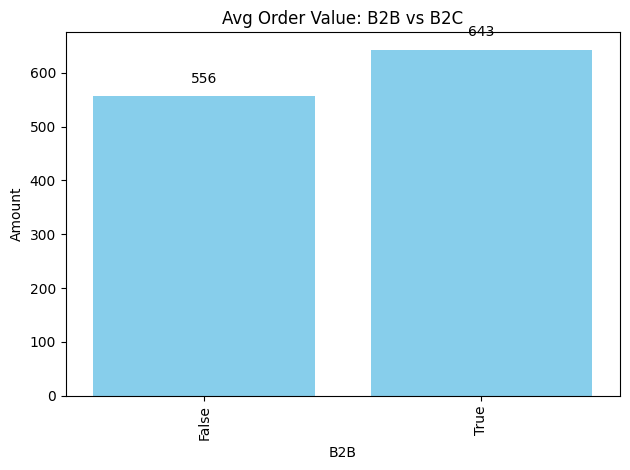

In [ ]:
# B2B vs B2C
df.groupby('B2B')['Amount'].mean().plot(kind='bar', title="Avg Order Value: B2B vs B2C")
bars = plt.bar(df.groupby('B2B')['Amount'].mean().index, df.groupby('B2B')['Amount'].mean().values, color='skyblue')

for bar in bars:
    height = bar.get_height()  # Get the height (average order value) of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height:.0f}',
             ha='center', va='bottom', fontsize=10)

plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [ ]:
df.dtypes

,0
Order ID,object
Date,datetime64[ns]
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object
Size,object


In [ ]:
df['Status']

,Status
0,Cancelled
1,Shipped - Delivered to Buyer
2,Shipped
3,Cancelled
4,Shipped
...,...
128944,Shipped
128945,Cancelled
128946,Shipped
128947,Shipped


**Logistics & Fulfillment Optimization**

In [ ]:
#Calculating average shipping time

shipping_times = {'Shipped': 3, 'Shipped - Delivered to Buyer': 5}
df['shipping_time'] = df['Status'].map(shipping_times)
df['delivery_date'] = df['Date'] + pd.to_timedelta(df['shipping_time'], unit='D')

average_shipping_time = df['shipping_time'].mean()
AVG_shipping_time = round(average_shipping_time)
print(f'Average shipping time is',AVG_shipping_time, 'days')

df

Average shipping time is 4 days


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,shipping_time,delivery_date
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,MUMBAI,MAHARASHTRA,400081.0,IN,Unknown,False,Easy Ship,Unknown,NaN,NaT
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,Unknown,5.0,2022-05-05
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown,Unknown,3.0,2022-05-03
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,Unknown,False,Easy Ship,Unknown,NaN,NaT
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,CHENNAI,TAMIL NADU,600073.0,IN,Unknown,False,Unknown,Unknown,3.0,2022-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,HYDERABAD,TELANGANA,500013.0,IN,Unknown,False,Unknown,False,3.0,2022-06-03
128945,402-9551604-7544318,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,NaN,NaT
128946,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,HYDERABAD,TELANGANA,500049.0,IN,Unknown,False,Unknown,False,3.0,2022-06-03
128947,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,3.0,2022-06-03


In [ ]:
#calculating shipping delays
# I assume some orders are delayed by 1-2 days, randomly.
np.random.seed(0)
delay = np.random.choice([0, 1, 2], size=len(df))
df['actual_delivery_date'] = df['delivery_date'] + pd.to_timedelta(delay, unit='D')

df['shipping_delay'] = (df['actual_delivery_date'] - df['delivery_date']).dt.days

df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,shipping_time,delivery_date,actual_delivery_date,shipping_delay
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,400081.0,IN,Unknown,False,Easy Ship,Unknown,NaN,NaT,NaT,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,Unknown,5.0,2022-05-05,2022-05-06,1.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown,Unknown,3.0,2022-05-03,2022-05-03,0.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,605008.0,IN,Unknown,False,Easy Ship,Unknown,NaN,NaT,NaT,NaN
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,600073.0,IN,Unknown,False,Unknown,Unknown,3.0,2022-05-03,2022-05-04,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128944,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,500013.0,IN,Unknown,False,Unknown,False,3.0,2022-06-03,2022-06-05,2.0
128945,402-9551604-7544318,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,NaN,NaT,NaT,NaN
128946,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,500049.0,IN,Unknown,False,Unknown,False,3.0,2022-06-03,2022-06-05,2.0
128947,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Unknown,False,3.0,2022-06-03,2022-06-03,0.0


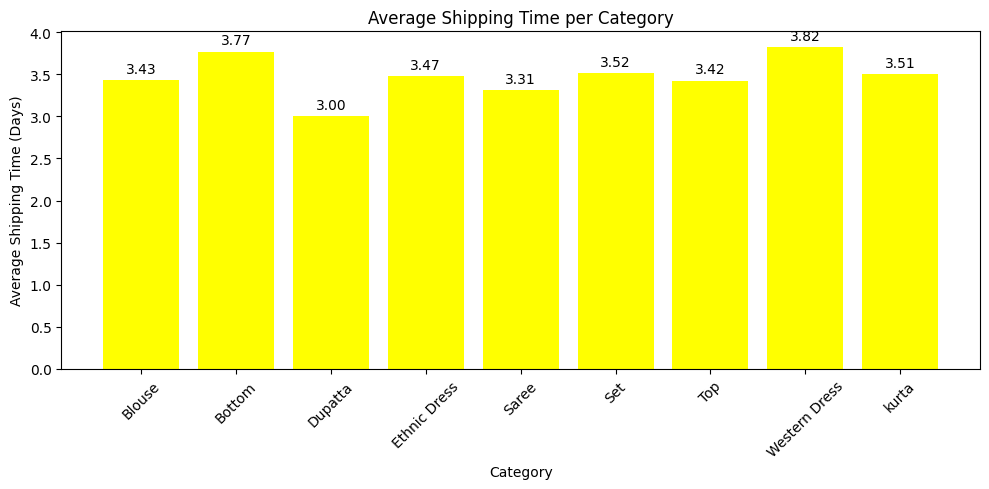

In [ ]:
# Grouping data and calculating average shipping time per category
average_shipping_time = df.groupby('Category')['shipping_time'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(average_shipping_time.index, average_shipping_time.values, color='yellow')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Shipping Time per Category')
plt.xlabel('Category')
plt.ylabel('Average Shipping Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting the average shipping time
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(avg_quantity_per_category.head(10).index, avg_quantity_per_category.head(10).values, color='orange')

# Adding labels to the top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height (average quantity) of each bar
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.title('Average Quantity Ordered per Category')
plt.xlabel('Category')
plt.ylabel('Average Quantity')

plt.tight_layout()
plt.show()

Comparing orders fulfilled by Amazon vs. Merchant fulfilment

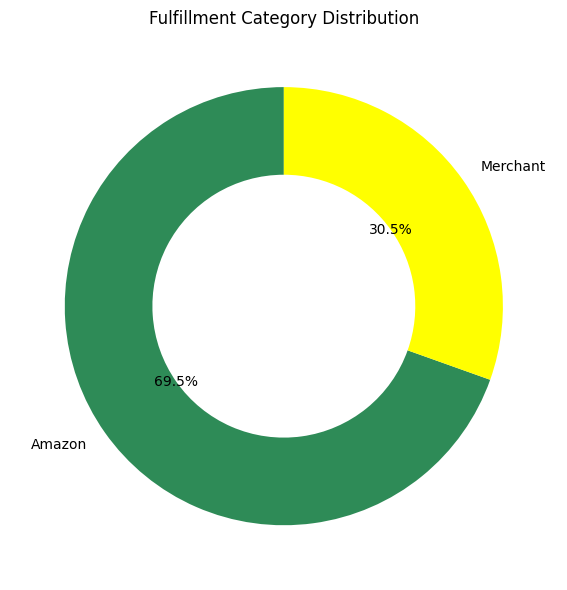

In [ ]:
fulfillment_counts = df['Fulfilment'].value_counts()

#Plot doughnut chart
plt.figure(figsize=(6, 6))
plt.pie(
    fulfillment_counts,
    labels=fulfillment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4},
    colors=['seagreen', 'yellow'])

plt.title('Fulfillment Category Distribution')
plt.tight_layout()
plt.show()

**Improving order processing for faster
deliveries** -
• Automate order entry from website,apps or marketplace.

• Real time inventory tracking to ensure only the available items are sold.

• Organizing the warehouse, that is keeping the best selling products near the packing zones which increases the faster packaging.

• Implementing order prioritization like, large quantity orders are delivered faster or setting a cut off time like, if the order is placed before a certain period of time, it will be delivered in the same day.

• Tracking the delivery dates separately. Also allowing the customers to track their orders. This increases good communications

**Product Management & Inventory Optimization**

In [ ]:
#identifying high demand product categories
category_demand = df.groupby('Category').agg({
    'Qty': 'sum',
    'Amount': 'sum'
}).sort_values(by='Qty', ascending=False)
category_demand.head(10)

,Qty,Amount
Category,,
Set,45288,35779587.14
kurta,45049,19473807.48
Western Dress,13943,10208405.00
Top,9902,4908912.00
Ethnic Dress,1052,732061.00
Blouse,864,420569.00
Bottom,398,135998.00
Saree,152,114694.00
Dupatta,3,915.00


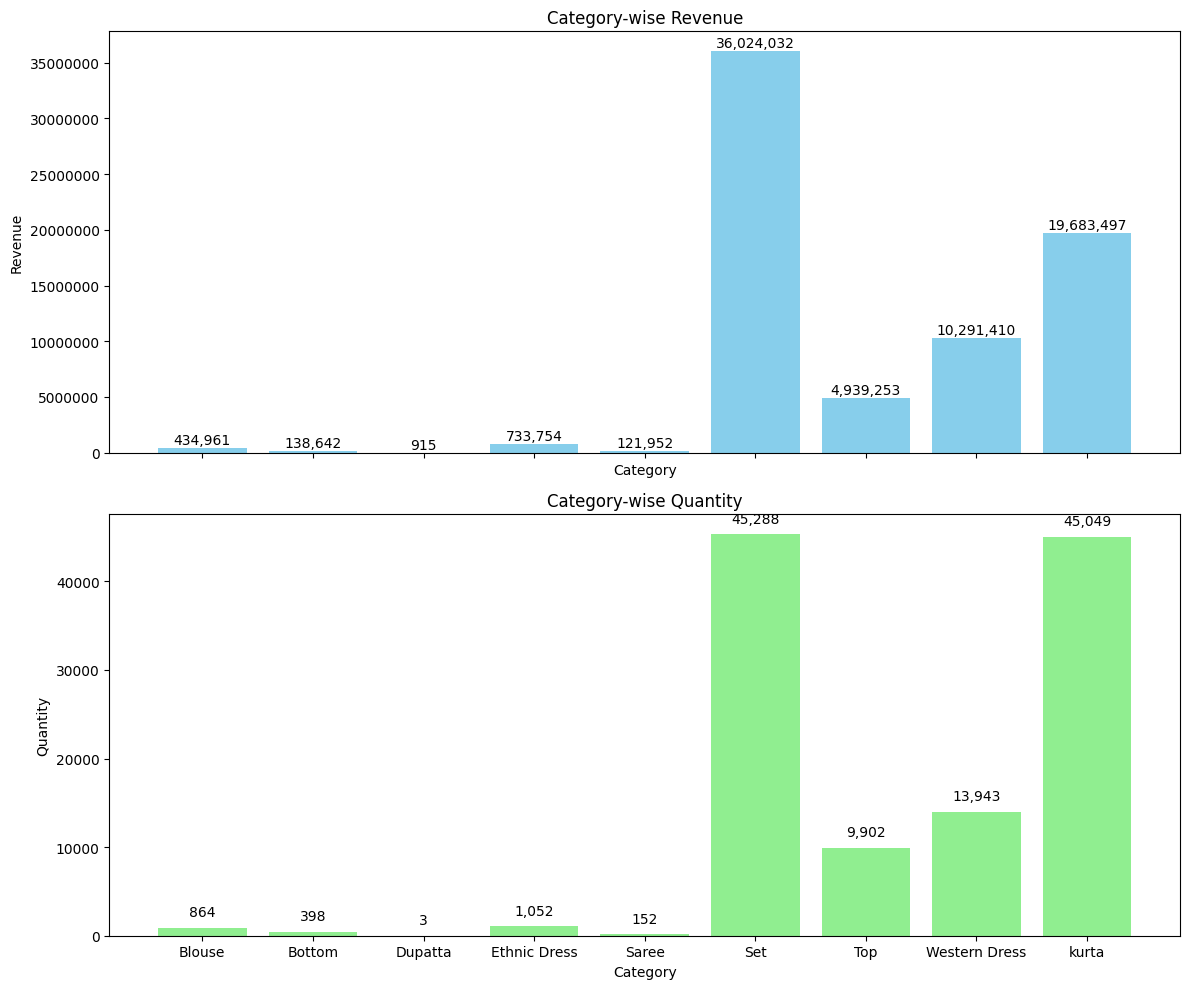

In [ ]:
category_stats = df.groupby('Category').agg({
    'Revenue': 'sum',
    'Qty': 'sum'
}).reset_index()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Category-wise Revenue Plot
ax1.bar(category_stats['Category'], category_stats['Revenue'], color='skyblue')
ax1.set_title('Category-wise Revenue')
ax1.set_xlabel('Category')
ax1.set_ylabel('Revenue')

for i, value in enumerate(category_stats['Revenue']):
    ax1.text(i, value + 100000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

# Category-wise Quantity Plot
ax2.bar(category_stats['Category'], category_stats['Qty'], color='lightgreen')
ax2.set_title('Category-wise Quantity')
ax2.set_xlabel('Category')
ax2.set_ylabel('Quantity')

for i, value in enumerate(category_stats['Qty']):
    ax2.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Analyzing the average quantity ordered
for efficient stock management.

In [ ]:
avg_quantity_per_category = df.groupby('Category')['Qty'].mean().sort_values(ascending=False)
round(avg_quantity_per_category.head(10))

,Qty
Category,
Dupatta,1.0
Blouse,1.0
Top,1.0
Saree,1.0
Ethnic Dress,1.0
Bottom,1.0
kurta,1.0
Set,1.0
Western Dress,1.0


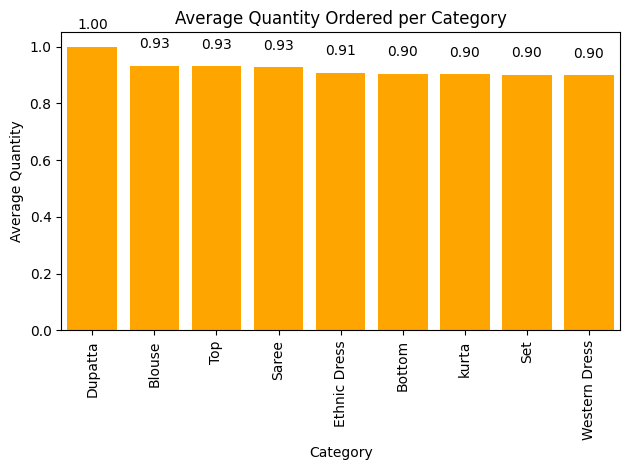

In [ ]:
# Plotting the average quantity per category
avg_quantity_per_category.head(10).plot(kind='bar', color='orange')

bars = plt.bar(avg_quantity_per_category.index, avg_quantity_per_category.head(10).values, color='orange')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Average Quantity Ordered per Category')
plt.xlabel('Category')
plt.ylabel('Average Quantity')
plt.tight_layout()
plt.show()

**Enhancing inventory control to prevent
stockouts or overstocking** -
• Real time inventory tracking to ensure if the stocks meet the orders.

• Creating an automated tracking system which will automatically update the inventory whenever an order is confirmed.

• Analyzing sales trends.

• Forecasting can be done to ensure if the stock needs to be increased or not.

• If the stock is having extras then release the old products(like if the products are sitting for 2 or 3 months) with discounts to clear the stocks.

**Customer Satisfaction & Returns**

In [ ]:
#Investigating high returns and cancellation rates
total_orders = df.groupby('Category')['Qty'].sum()

returned = df[df['Status'].str.lower() == 'shipped - returned to seller'].groupby('Category')['Qty'].sum()

cancelled = df[df['Status'].str.lower() == 'cancelled'].groupby('Category')['Qty'].sum()

return_cancel_data = pd.concat([total_orders, returned, cancelled], axis=1)
return_cancel_data.columns = ['total_orders', 'returned', 'cancelled']
return_cancel_data = return_cancel_data.fillna(0)

#rates
return_cancel_data['return_rate (%)'] = (return_cancel_data['returned'] / return_cancel_data['total_orders']) * 100
return_cancel_data['cancellation_rate (%)'] = (return_cancel_data['cancelled'] / return_cancel_data['total_orders']) * 100

return_cancel_data.sort_values(by='return_rate (%)', ascending=False).head(10)

,total_orders,returned,cancelled,return_rate (%),cancellation_rate (%)
Category,,,,,
Western Dress,13943,313.0,529.0,2.244854,3.794019
Set,45288,766.0,2262.0,1.691397,4.994701
kurta,45049,729.0,2262.0,1.618238,5.021199
Ethnic Dress,1052,16.0,38.0,1.520913,3.612167
Blouse,864,12.0,32.0,1.388889,3.703704
Top,9902,127.0,536.0,1.282569,5.413048
Bottom,398,5.0,14.0,1.256281,3.517588
Saree,152,1.0,5.0,0.657895,3.289474
Dupatta,3,0.0,0.0,0.000000,0.000000


In [ ]:
#identifying problematic category/product

#checking if the return and cancellation rates are higher for each product
return_cancel_data['return_rate (%)'] = (return_cancel_data['returned'] / return_cancel_data['total_orders']) * 100
return_cancel_data['cancellation_rate (%)'] = (return_cancel_data['cancelled'] / return_cancel_data['total_orders']) * 100

return_cancel_data.sort_values(by='return_rate (%)', ascending=False).head(10)

,total_orders,returned,cancelled,return_rate (%),cancellation_rate (%)
Category,,,,,
Western Dress,13943,313.0,529.0,2.244854,3.794019
Set,45288,766.0,2262.0,1.691397,4.994701
kurta,45049,729.0,2262.0,1.618238,5.021199
Ethnic Dress,1052,16.0,38.0,1.520913,3.612167
Blouse,864,12.0,32.0,1.388889,3.703704
Top,9902,127.0,536.0,1.282569,5.413048
Bottom,398,5.0,14.0,1.256281,3.517588
Saree,152,1.0,5.0,0.657895,3.289474
Dupatta,3,0.0,0.0,0.000000,0.000000


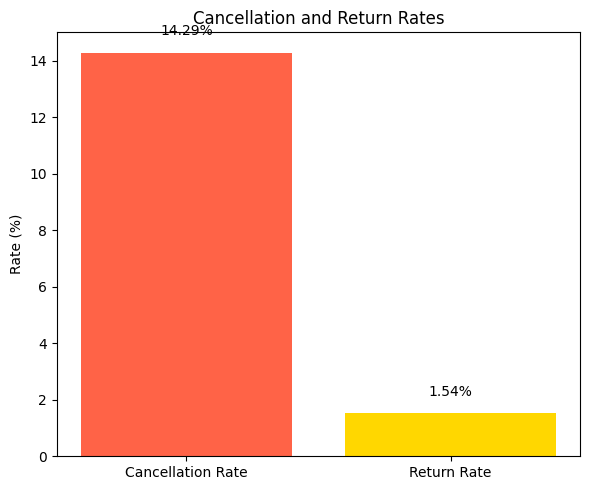

In [ ]:
# Calculate the cancellation and return rates
total_orders = df['Order ID'].nunique()
cancelled_orders = df[df['Status'] == 'Cancelled']['Order ID'].nunique()
returned_orders = df[df['Status'] == 'Shipped - Returned to Seller']['Order ID'].nunique()

cancel_rate = (cancelled_orders / total_orders) * 100
return_rate = (returned_orders / total_orders) * 100
rates = [cancel_rate, return_rate]
labels = ['Cancellation Rate', 'Return Rate']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, rates, color=['tomato', 'gold'])

for bar in bars:
    height = bar.get_height()  # Get the height (rate) of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%',
             ha='center', va='bottom', fontsize=10)

plt.title('Cancellation and Return Rates')
plt.ylabel('Rate (%)')
plt.tight_layout()
plt.show()

In [ ]:
#Checking what is the revenue per order
category_value = df.groupby('Category').agg({'Amount': 'sum', 'Order ID': 'nunique'})
category_value['revenue_per_order'] = category_value['Amount'] / category_value['Order ID']
category_value.sort_values('revenue_per_order').head(10)

,Amount,Order ID,revenue_per_order
Category,,,
Bottom,135998.00,410,331.702439
kurta,19473807.48,46551,418.332742
Dupatta,915.00,2,457.500000
Blouse,420569.00,897,468.861761
Top,4908912.00,10154,483.446130
Ethnic Dress,732061.00,1147,638.239756
Western Dress,10208405.00,14989,681.059777
Set,35779587.14,47836,747.963608
Saree,114694.00,144,796.486111


**Improving Customer Experience Through Better Service Policies** -

• Return policies should be fair. Like 7 days hassle free return. It builds trust between the seller and buyer.

• Hassle free refunds. There should be a policy regarding the refund that the refund will generated to the customers account in 24-48 hours, after the product is picked up.

• There should be a fair shipping policy too. The orders must be delivered in the said delivery date. The cusromer should be allowed to track their order.

• If the order is delayed, the seller can give some compensations. This can keep the retention rate higher.

• Company can set up a whatsapp chatbot for customer support. If the customer needs any help they can ask their queries to the chatbot.

**CONCLUSION**

This dashboard was created to analyze sales performance, customer behavior, and operational efficiency using key metrics such as total revenue, average order value, return rates, and cancellation rates across different locations, categories over time.

Monthly Revenue: Revenue has peaked in the month of April, and then decreased slowly in may and june.

Average Order Value (AOV): AOV consistently improved, crossing ₹640 in the first week of June.

Return Rate: Return rates are not more than 2%, which simply indicates a good product quality and customer satisfaction.

Cancellation Rate: Certain categories, like "Kurta", "Set" , "Bottom" etc. had high cancellation rates exceeding 14% — which can be the result of stock outs, delayed shipping or transaction issues.

Geography Insight: Bengaluru drove the highest order volumes, followed by Hyderabad and New Delhi.

Customer Behavior: Repeat customer insights and retention rates were indirectly estimated by combining city, state, country and postal code data — showing promising loyalty patterns, though a true customer ID is missing.

**RECOMMENDATIONS**

• Automate tracking every fulfillment details in real time. This helps in better analysis.

• Track the shipping time(if the order is delayed or not. If so, then how much time it took)

• Track fulfillment partner performance monthly.

• Special offers can be given for the repeated customers or those with >10% return rates.

• Stock the in-demand products to avoid overstocking or stockouts. Check which category has the high revenues and less return/cancellation rates.

• Seasonal sales trends tracking is important.

• Investigate the problematic categories, is that, which categories/products has high return/cancellation rates, lower revenue.

• Customer feedbacks must be taken for improvements.